# How AI is impacting Software Engineering Jobs

## Goals

- Are AI tools, such as Chat GPT, impacting Software Engineering jobs?

- Has the amount of job openings increased / decreased / stayed the same?

# Hypothesis

- Seasonal
    - I think companies hire more at the start of the year, and it may fluctuate throughout the year

- Short-term
    - I don't think AI will reduce the need for software engineers in its current state (a human is still required to piece things together)

- Long-term
    - Perhaps AI tools will improve and the entry level software engineer jobs will be less available

## ChatGPT release date

- Chat GPT, released **30th November 2022** ([Source](https://en.wikipedia.org/wiki/ChatGPT#:~:text=by%20OpenAI%20and-,launched%20on%20November%2030%2C%202022,-.%20Based%20on%20a))

## Dataset: FRED - Federal Reserve Bank of St. Louis

[Software Development Job Postings on Indeed - United States](https://fred.stlouisfed.org/series/IHLIDXUSTPSOFTDEVE)
- This dataset is limited to job postings on [Indeed](https://uk.indeed.com)
- The units are **"Index Feb, 1 2020=100, Seasonally Adjusted**"
    - This means that `100` is the value it was on Feb 1 2020, and all values are relative to point in time
    - Sesonally Adjusted means it will take an average to remove peaks and troughs

In [33]:
import pandas as pd

data = pd.read_csv(
    "./datasets/fred-software-development-jobs-indeed-us.csv", 
    parse_dates=[0],
    index_col=0
)

df = pd.DataFrame(data)

df.head()

,IHLIDXUSTPSOFTDEVE
DATE,
2020-02-01,100.00
2020-02-02,99.75
2020-02-03,99.55
2020-02-04,99.29
2020-02-05,99.22


In [34]:
# Update column names
(
    df
    .rename(columns={"IHLIDXUSTPSOFTDEVE":"index"})
    .rename_axis('date')
)

,index
date,
2020-02-01,100.00
2020-02-02,99.75
2020-02-03,99.55
2020-02-04,99.29
2020-02-05,99.22
...,...
2024-01-01,73.82
2024-01-02,73.58
2024-01-03,73.40


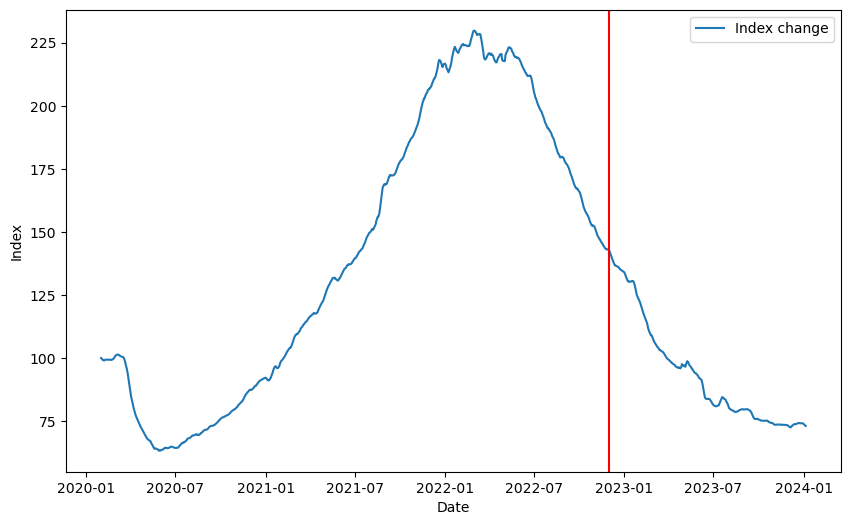

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df, label="Index change")

# Add a line for the date when Chat GPT was released
plt.axvline(pd.Timestamp('2022-11-30'),color='r')

plt.xlabel("Date")
plt.ylabel("Index")
plt.legend()
plt.show()

The peek around 2022 might be due to hiring during Covid-19

## Dataset: Nomis - Official Census and Labour Market Statistics

Nomis has a [Employment by occupation by sex](https://www.nomisweb.co.uk/datasets/aps218/reports/employment-by-occupation?compare=K02000001) dataset

In [36]:
data = pd.read_csv(
    "./datasets/employment-by-sex.csv", 
    parse_dates=[0],
    index_col=0
)

df = pd.DataFrame(data)

df

/var/folders/m6/3l5d4lhn3vn14b8bzsfxs60r0000gn/T/ipykernel_1779/261583620.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(


,United Kingdom
Date,
Jan 2021-Dec 2021,27238400
Apr 2021-Mar 2022,27379400
Jul 2021-Jun 2022,27514700
Oct 2021-Sep 2022,27566900
Jan 2022-Dec 2022,27643500
Apr 2022-Mar 2023,27653000
Jul 2022-Jun 2023,27676600
Oct 2022-Sep 2023,27763600


The Nomis data seems to be a range.

I wasn't able to find a suitable solution, so I decided to take the middle date from each row.

In [37]:
data = pd.read_csv(
    "./datasets/employment-by-sex-middle.csv", 
    parse_dates=[0],
    index_col=0
)

df = pd.DataFrame(data)

df

,United Kingdom
Date,
2021-01-06,27238400
2021-01-09,27379400
2021-01-12,27514700
2022-01-03,27566900
2022-01-06,27643500
2022-01-09,27653000
2022-01-12,27676600
2023-01-03,27763600


In [38]:
(
    df
    .rename(columns={"United Kingdom":"software_engineers"})
    .rename_axis('date')
)

,software_engineers
date,
2021-01-06,27238400
2021-01-09,27379400
2021-01-12,27514700
2022-01-03,27566900
2022-01-06,27643500
2022-01-09,27653000
2022-01-12,27676600
2023-01-03,27763600


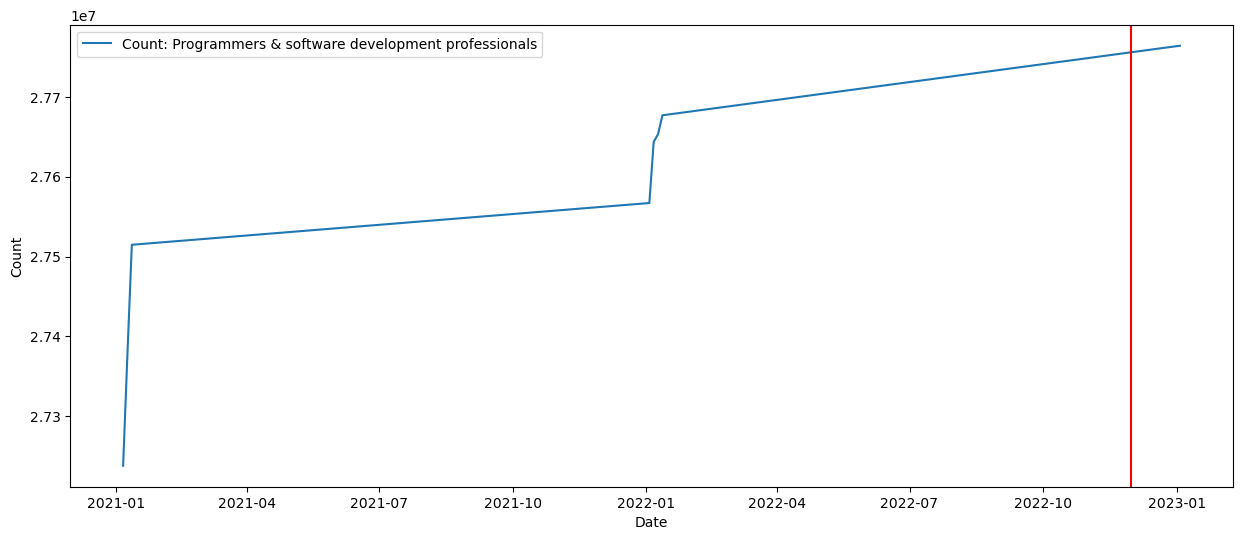

In [39]:
plt.figure(figsize=(15,6))
plt.plot(df, label="Count: Programmers & software development professionals")

# Add a line for the date when Chat GPT was released
plt.axvline(pd.Timestamp('30-11-2022'),color='r')

plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()

Due to the lack of data points, the graph is difficult to read.

## Next steps

- Compare against other job categories that aren't unaffected by AI
- Decide on some variables to test e.g.
    - Job openings
    - Google search trends for the term "Chat GPT"
- See if there's a correlation between these two variables